In [1]:
import openai
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from googlesearch import search
from docx import Document

import re
import requests
import nltk
import spacy

In [2]:
%cd ..

with open('private.txt', 'r') as f:
    content = f.read()
    key = re.findall(r'\'.*?\'', content)[0].strip('\'')
    openai.api_key = key
f.close()

%cd experiment    

h:\Andere Computer\Mein Computer\GoogleDrive\Beruf\Freelancing\Code_Repo\NLP_Text_Generation_Webapp
h:\Andere Computer\Mein Computer\GoogleDrive\Beruf\Freelancing\Code_Repo\NLP_Text_Generation_Webapp\experiment


# Define Keywords

In [3]:
# define key words
keywords = ['Finanzielle Hilfe im Alter', 
            'Rentner in Not',
            'Armut Senioren',
            'Altersarmut Frauen',
            'Renten Pay-Gap',
            'Unterstützung Rentner']

# Generate Topic List 

## Generate Topics from Latest Article Headlines Found by Google Search

In [4]:
# Query google keyword by keyword
titles_google = []
source_google = []

for kw in keywords:
  query = kw
  for url in search(query, num_results=10, lang="de"):
      # print url
      print(url)
      # print article titles
      html_string = requests.get(url).content
      try:
        # get title info
        title = re.search(b'<title>(.*?)</title>', html_string).group(1)
        title = title.decode('utf-8')
        title = title.split('.')[0].split('&')[0].split('|')[0].split('-')[0]
        print(title)
        titles_google.append(title)
        source_google.append(url)

      except:
        print('Retrieving the title not feasible.')

https://familienportal.de/familienportal/lebenslagen/alter/staatliche-leistungen
Staatliche Leistungen im Alter 
https://www.caritas.de/hilfeundberatung/ratgeber/alter/pflege/finanzielle-hilfe-wenn-die-rente-nicht-reicht
Finanzielle Hilfe wenn die Rente nicht reicht
https://www.kennstdueinen.de/magazin/geldnot-im-alter-welche-finanziellen-hilfen-gibt-es-wenn-die-rente-nicht-reicht/
Geldnot im Alter 
https://www.seniorenlebenshilfe.de/dienstleistungen-fuer-senioren/grundsicherung-im-alter/
Wichtige Infos zur Grundsicherung im Alter 
https://www.focus.de/finanzen/altersvorsorge/staatliche-unterstuetzung-viel-mehr-geld-im-alter-sieben-lohnende-zuschuesse-fuer-rentner_id_8970984.html
Viel mehr Geld im Alter: Sechs lohnende Zuschüsse für Rentner 
https://www.einherzfuerrentner.de/fuer-rentner/
Für Rentner 
https://www.ihre-vorsorge.de/magazin/lesen/wenn-das-geld-im-alter-nicht-reicht-finanzielle-unterstuetzung-fuer-rentner.html
Wenn das Geld im Alter nicht reicht: Finanzielle Unterstützung 

In [5]:
# turn titles and sources into dataframe
df_titles_google = pd.DataFrame({'source': source_google, 'title': titles_google})
df_titles_google.head(10)

,source,title
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht
2,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter
3,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter
4,https://www.focus.de/finanzen/altersvorsorge/s...,Viel mehr Geld im Alter: Sechs lohnende Zuschü...
5,https://www.einherzfuerrentner.de/fuer-rentner/,Für Rentner
6,https://www.ihre-vorsorge.de/magazin/lesen/wen...,Wenn das Geld im Alter nicht reicht: Finanziel...
7,https://www.serviceportal-zuhause-im-alter.de/...,Finanzielle Förderung
8,https://www.betanet.de/sozialhilfe-altenhilfe....,Sozialhilfe > Altenhilfe
9,https://seniorenhilfe-lichtblick.de/,LichtBlick Seniorenhilfe e


## Generate Topics Based on ChatGPT

In [6]:
instruction = \
"Nenne zu folgenden Keywords " + '\n' \
'keywords = ' + str(keywords)  + '\n' \
'20 Themenüberschriften.'
print('Instruction: ', instruction)

Instruction:  Nenne zu folgenden Keywords 
keywords = ['Finanzielle Hilfe im Alter', 'Rentner in Not', 'Armut Senioren', 'Altersarmut Frauen', 'Renten Pay-Gap', 'Unterstützung Rentner']
20 Themenüberschriften.


In [7]:
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=instruction,
    temperature=.5,
    max_tokens=1000,
    top_p=1,
    n=2,
    presence_penalty=.5,
    frequency_penalty=.5,
)

titles_chatgpt = response['choices'][0].text

# format titles and put into list
titles_chatgpt = [title.strip().replace("\n", "").replace(". ", "") for title in re.split(r'\d+', titles_chatgpt)]

In [8]:
# turn titles and sources into dataframe
df_titles_chatgpt = pd.DataFrame({'source': 'chatgpt', 'title': titles_chatgpt})
df_titles_chatgpt.head(10)

,source,title
0,chatgpt,
1,chatgpt,Finanzielle Unterstützung für Rentner in Not
2,chatgpt,Arme Senioren - Ein Blick auf die Altersarmut ...
3,chatgpt,Der Renten Pay-Gap - Wie groß ist die Lücke?
4,chatgpt,Hilfe im Alter: Die besten Optionen für Rentner
5,chatgpt,Altersarmut bei Frauen - Was können wir tun?
6,chatgpt,Warum sind so viele Rentner von Armut betroffen?
7,chatgpt,"Welche Möglichkeiten gibt es, um älteren Mensc..."
8,chatgpt,Unterstützung für Rentner in schwierigen Zeiten
9,chatgpt,Die Auswirkungen der Altersarmut auf Frauen


In [9]:
# concat both title dataframes
df_titles = df_titles_google.append(df_titles_chatgpt)
df_titles

C:\Users\Sebas\AppData\Local\Temp\ipykernel_11968\473715585.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_titles = df_titles_google.append(df_titles_chatgpt)


,source,title
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht
2,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter
3,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter
4,https://www.focus.de/finanzen/altersvorsorge/s...,Viel mehr Geld im Alter: Sechs lohnende Zuschü...
...,...,...
16,chatgpt,Der Kampf gegen Armut und Ungerechtigkeit im A...
17,chatgpt,Werden unsere Rentner angemessen unterstützt?
18,chatgpt,Verbesserte Lebensqualität für ältere Menschen...
19,chatgpt,"Kann mehr getan werden, um den Rentenzahlungsu..."


## Apply Topic-Keyword Similarity Filter

In [10]:
nlp = spacy.load("de_core_news_lg")

In [11]:
# measure similarity between the titles and the keywords
title_keyword_similarity = []
for title in df_titles['title']:
  sim_score = 0
  for kw in keywords:
    sim_score += nlp(title).similarity(nlp(kw)) / len(keywords) # average similarity score for better interpretability
  # append sum of similarity scores
  title_keyword_similarity.append(np.round(sim_score, 2))

C:\Users\Sebas\AppData\Local\Temp\ipykernel_11968\4193192492.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim_score += nlp(title).similarity(nlp(kw)) / len(keywords) # average similarity score for better interpretability


In [12]:
# Add title-keyword similarity scores to df_titles
df_titles['keyword_similarity'] = title_keyword_similarity
df_titles.head()

,source,title,keyword_similarity
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter,0.40
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht,0.40
2,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter,0.33
3,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter,0.30
4,https://www.focus.de/finanzen/altersvorsorge/s...,Viel mehr Geld im Alter: Sechs lohnende Zuschü...,0.39


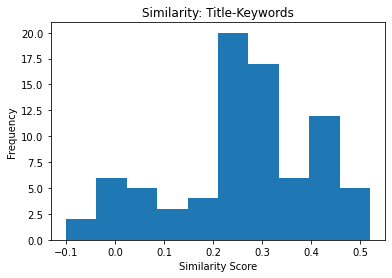

In [13]:
# show title-similarity distribution
plt.hist(df_titles['keyword_similarity'])
plt.title('Similarity: Title-Keywords')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

In [14]:
# filter out similarity score < 0.1
df_titles = df_titles[df_titles['keyword_similarity'] > 0.1]
df_titles = df_titles.sort_values(by='keyword_similarity', ascending=False, ignore_index=True)
df_titles

,source,title,keyword_similarity
0,chatgpt,Finanzielle Unterstützung für Rentner in Not,0.52
1,https://www.viele-schaffen-mehr.de/projekte/hi...,Finanzielle Hilfe für Rentner in Not,0.52
2,chatgpt,Unterstützung für Rentner in schwierigen Zeiten,0.48
3,https://frauen.verdi.de/themen/rente/++co++c0b...,Frauen haben niedrigere Renten – ver,0.46
4,https://www.wn.de/muenster/immer-mehr-rentner-...,Immer mehr Rentner in Not,0.46
...,...,...,...
62,https://www.dza.de/detailansicht/im-arbeitsleb...,Im Arbeitsleben und im Ruhestand: gravierende ...,0.18
63,https://www.malteser.de/dabei/information-tipp...,Altersarmut in Deutschland: Ein Überblick,0.17
64,https://www.aktion-deutschland-hilft.de/de/fac...,Wie entsteht Altersarmut?,0.14
65,chatgpt,Der Renten Pay-Gap - Wie groß ist die Lücke?,0.13


## Save Topic Ideation as Word Document

In [15]:
# create a word document 
document = Document()

# add table to document
table = document.add_table(rows=1, cols=3)
table.style = 'Table Grid'

# add table header
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Source'
hdr_cells[1].text = 'Title'
hdr_cells[2].text = 'Keyword Similarity'

# add data to table
for i in range(len(df_titles)):
    row_cells = table.add_row().cells
    row_cells[0].text = df_titles.iloc[i]['source']
    row_cells[1].text = df_titles.iloc[i]['title']
    row_cells[2].text = str(df_titles.iloc[i]['keyword_similarity'])

# save word document
document.save('topic_ideation.docx')

# Advise ChatGPT to Write Article for Given Topic

In [16]:
topic = df_titles['title'][2]
print(topic)

Unterstützung für Rentner in schwierigen Zeiten


In [17]:
instruction = "\n" + \
"Schreibe einen Artikel von 250 Wörtern zum Thema: \n" + \
topic + '. \n' + \
"Der Artikel soll die Schlüsselbegriffe " + '\n' + \
str(keywords) + '\n' + \
"enthalten." + '\n' + \
"Desweiteren soll der Artikel in Absätze und Überschriften unterteilt sein." + '\n' + \
"Desweiteren sollen die Überschriften die Schlüsselbegriffe enthalten."

print('Instruction: ', instruction)

Instruction:  
Schreibe einen Artikel von 250 Wörtern zum Thema: 
Unterstützung für Rentner in schwierigen Zeiten. 
Der Artikel soll die Schlüsselbegriffe 
['Finanzielle Hilfe im Alter', 'Rentner in Not', 'Armut Senioren', 'Altersarmut Frauen', 'Renten Pay-Gap', 'Unterstützung Rentner']
enthalten.
Desweiteren soll der Artikel in Absätze und Überschriften unterteilt sein.
Desweiteren sollen die Überschriften die Schlüsselbegriffe enthalten.


In [18]:
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=instruction,
    temperature=.5,
    max_tokens=1000,
    top_p=1,
    n=2,
    presence_penalty=.5,
    frequency_penalty=.5,
)

text_seo = response['choices'][0].text

In [19]:
print(text_seo)



Unterstützung für Rentner in schwierigen Zeiten 
In den letzten Jahren ist die Zahl der Rentner, die finanzielle Hilfe im Alter benötigen, stark gestiegen. Vor allem Frauen sind von Altersarmut betroffen. Dies liegt an einem großen Renten-Pay-Gap zwischen Männern und Frauen sowie an mangelnder Unterstützung für ältere Menschen. Daher ist es wichtig, dass Maßnahmen ergriffen werden, um dieser Entwicklung entgegenzuwirken und Rentner in Not zu unterstützen. 

Finanzielle Hilfe im Alter
Um die finanziellen Probleme von Rentnern zu lösen, muss der Staat mehr Geld in die Altersversorgung investieren. Es ist wichtig, dass Senioren eine angemessene Rente erhalten, damit sie ihren Lebensunterhalt bestreiten können. Dazu gehört auch ein höheres Grundeinkommen für ältere Menschen sowie eine Erhöhung der staatlichen Rentenzahlungen. 

Rentner in Not unterstützen 
Darüber hinaus muss auch dafür gesorgt werden, dass Senioren bei Bedarf Unterstützung erhalten. Dies kann beispielsweise durch Beratu

## Save SEO Text as Word Document

In [20]:
# Create a new document object.
document = Document()

# Create a new paragraph object.
paragraph = document.add_paragraph()

# Write the string to the paragraph object.
paragraph.add_run(text_seo)

# Save the document.
document.save('seo_text.docx')

# ToDo

- Include Keywords into article generation -> ok
- Add column with publication date!
- Save Topic List and hand over to Alexa -> warte auf Feedback
- correct topic titles
- code review: make functions
- develop streamlit app